1. Importando bibliotecas

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import EarlyStopping



2. Carregando Dataset

In [142]:

df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', sep=',')
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [143]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

2.1 Convertendo Dataset


In [144]:
df['Gender'] = df['Gender'].astype("category").cat.codes.values
df['Occupation'] = df['Occupation'].astype("category").cat.codes.values
df['BMI Category'] = df['BMI Category'].astype("category").cat.codes.values
df['Blood Pressure'] = df['Blood Pressure'].astype("category").cat.codes.values

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    int8   
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    int8   
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    int8   
 9   Blood Pressure           374 non-null    int8   
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), int8(4), object(1)
memory usage: 27.9+ KB


2.2 Trocar Valor no Dataset

In [146]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('sem disturbio')
classes = df['Sleep Disorder'].unique()
#print(classes)

In [147]:
df['Sleep Disorder'].value_counts()


Sleep Disorder
sem disturbio    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64

2.3 Dividindo Dataset 

In [148]:
X = df.iloc[:, 1:12].values 
y = df['Sleep Disorder'].values

#print(X)
#print(y)

2.4 Equilibrar Dataset

In [149]:
sm = SMOTE(random_state=42,k_neighbors=5)
dataset_res, ouput_label= sm.fit_resample(X,y)


2.5 Separando Dataset entre treino e teste

In [150]:
X_train, X_test, y_train, y_test = train_test_split(dataset_res, ouput_label, test_size=0.2)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

y_train_onehot = pd.get_dummies(y_train).values
y_test_onehot = pd.get_dummies(y_test).values
#print(y_train)

In [151]:
early_stopping = EarlyStopping(monitor='val_loss',patience=10, mode='min',restore_best_weights=True)

3. Criando o modelo

In [152]:
# Modelo de rede perceptron multicamadas com uma camada oculta de 64 neurônios
# e camada de saída com 3 neurônios (3 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=11, activation='sigmoid', name='oculta'))
model.add(tf.keras.layers.Dense(32, activation='sigmoid',name='oculta2'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(3, activation='softmax', name='saida'))
#model.summary() #visualizando o modelo

4. Compilando e treinando o modelo


In [153]:
# Compile model
# Otimizador Adam com taxa de aprendizado de 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# Função de custo categorical_crossentropy (para problemas de classificação com mais de duas classes)
# Métrica de avaliação MSE (Mean Squared Error)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse'])

In [154]:
history = model.fit(X_train_std, y_train_onehot, validation_split=0.2, epochs=100)

Epoch 1/100


14/14 [==============================] - 2s 34ms/step - loss: 1.1151 - mse: 0.2230 - val_loss: 0.9489 - val_mse: 0.1882
Epoch 2/100
14/14 [==============================] - 0s 10ms/step - loss: 0.8787 - mse: 0.1712 - val_loss: 0.6659 - val_mse: 0.1215
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.6356 - mse: 0.1134 - val_loss: 0.4384 - val_mse: 0.0717
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.5268 - mse: 0.0887 - val_loss: 0.3547 - val_mse: 0.0568
Epoch 5/100
14/14 [==============================] - 0s 10ms/step - loss: 0.4900 - mse: 0.0799 - val_loss: 0.3295 - val_mse: 0.0520
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.4565 - mse: 0.0749 - val_loss: 0.3215 - val_mse: 0.0497
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 0.4541 - mse: 0.0727 - val_loss: 0.3131 - val_mse: 0.0483
Epoch 8/100
14/14 [==============================] - 0s 17ms/step - loss: 0.4075 - mse: 0.06

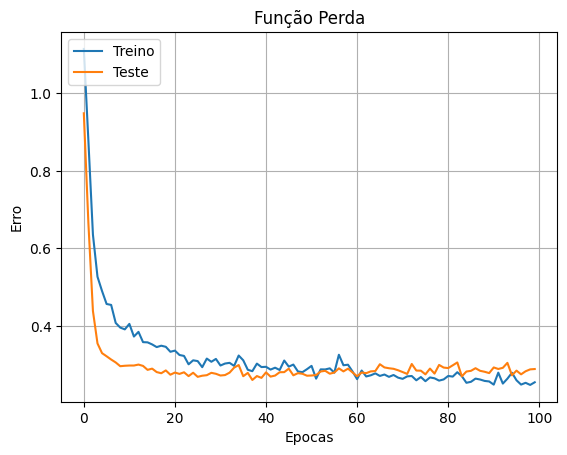

In [155]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.yscale("log")
plt.title('Função Perda')
plt.ylabel('Erro')
plt.xlabel('Epocas')
plt.legend(['Treino','Teste'], loc='upper left')
plt.grid()
plt.show()

In [156]:
#historico = pd.DataFrame(history.history)
#historico.to_csv('Historico.csv')

In [157]:
#model.save('model_final.h5')

In [158]:
output_model_ = np.argmax(model.predict(X_test_std), axis=-1)
y_test_class = np.argmax(y_test_onehot, axis=-1)

5/5 [==============================] - 0s 3ms/step


In [159]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia:', accuracy_score(y_test_class, output_model_))
print('Precisão:', precision_score(y_test_class, output_model_, average='macro'))
print('Sensibilidade:', recall_score(y_test_class, output_model_, average='macro'))
print('F1-Score:', f1_score(y_test_class, output_model_, average='macro'))

Acurácia: 0.8939393939393939
Precisão: 0.8941798941798941
Sensibilidade: 0.8940006740815639
F1-Score: 0.8938600615071204


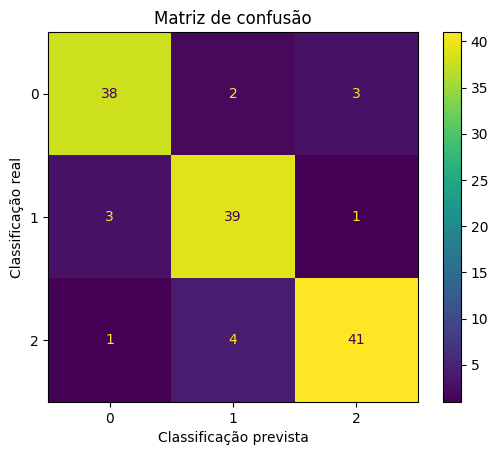

In [160]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_class, output_model_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()